# Sentiment Analysis of Tweets Related to the COVID-19 Vaccine: A Study of Public Perception

Abstract: This paper presents a sentiment analysis of tweets related to the COVID-19 vaccine, with a focus on understanding the public perception of the vaccine. Using a pre-existing dataset from Kaggle, we analyzed the sentiment towards the vaccine over a two-year period, from 2020 to 2022. Our analysis revealed that the sentiment towards the vaccine is generally positive, but there is a mix of positive and negative opinions expressed. Furthermore, there is a difference in sentiment between tweets from verified users and general tweets, with verified users having a more positive sentiment towards the vaccine. Addressing misinformation and improving communication strategies are important steps to promote vaccine uptake. Our findings provide valuable insights that can inform future vaccine policy and communication strategies to promote vaccine uptake and prepare for potential future disease outbreaks.


## Introduction

The COVID-19 pandemic has disrupted every aspect of human life, causing widespread suffering and economic turmoil. The swift development of vaccines to combat the virus has been a critical step in the global response to the pandemic. With several vaccines now available, countries around the world have begun mass vaccination campaigns in an effort to curb the spread of the virus and return to a sense of normalcy.

Despite the proven efficacy and safety of the COVID-19 vaccines, public opinion about them remains divided. Some people eagerly embrace the vaccines as a means to protect themselves and their communities, while others express skepticism or opposition to vaccination, often fueled by misinformation or mistrust of the scientific community and government institutions.

Social media platforms, such as Twitter, have become vital sources of information and discussion during the pandemic. Analyzing the sentiment expressed in tweets related to the COVID-19 vaccine can provide valuable insights into public perception and attitudes, and help inform public health communication strategies.


## Research Question

In this study, we aim to answer the following research question: What is the overall sentiment towards the COVID-19 vaccine on Twitter, and how has it evolved over time?


## Hypothesis

We hypothesize that the sentiment towards the COVID-19 vaccine on Twitter will be mixed, with both positive and negative opinions expressed. However, we expect that the overall sentiment will lean towards the positive, and that sentiment will improve as time progresses.


## Significance of the Study

Understanding public sentiment towards the COVID-19 vaccine is crucial for several reasons. First, it can help policymakers and public health officials identify areas of concern or resistance to vaccination, enabling them to develop targeted communication strategies to address misconceptions and build trust in the vaccines. Second, it can provide insights into the effectiveness of public health messaging and identify areas where additional efforts may be needed to improve public perception of the vaccines. Lastly, monitoring changes in sentiment over time can help to assess the impact of ongoing vaccination campaigns and identify trends that may inform future public health interventions.

In the following sections, we will describe the methodology used for our sentiment analysis, present the results of our study, and discuss the implications of our findings for public health communication and vaccine promotion strategies.

## Methods

We conducted sentiment analysis on tweets pertaining to the COVID-19 vaccine using a pre-existing dataset from Kaggle, as Twitter's API had certain restrictions ([https://www.kaggle.com/datasets/kaushiksuresh147/covidvaccine-tweets](https://www.kaggle.com/datasets/kaushiksuresh147/covidvaccine-tweets)). The dataset we used, called "COVID Vaccine Tweets," was sourced from Twitter's API and uploaded by Kaggle user kaushiksuresh147. It contained 39,032 rows of data, with each row representing a tweet related to the COVID-19 vaccine. The dataset had several features, such as tweet ID, tweet text, user ID, location, and date.

We chose to collect data related to the COVID-19 vaccine between 2020 and 2022, during the period when the pandemic was most severe, instead of continuing to track data during the more recent period. One reason is that the sentiment towards the vaccine may have stabilized by then, and there may not have been significant changes in the overall sentiment towards the vaccine. Additionally, the pandemic's impact may have reduced significantly, leading to a lower volume of tweets related to the vaccine. In addition, collecting data beyond 2022 would have required a significant amount of time and resources, and we wanted to focus on analyzing a substantial amount of data from the period when the pandemic was most severe. Thus, we believe that analyzing data from the period when the pandemic was most severe provides a comprehensive understanding of the sentiment towards the COVID-19 vaccine on social media.

Certainly, we analyzed a significant amount of data related to the COVID-19 vaccine using Python and the VADER sentiment analysis tool. The process of analyzing the data involved loading the data from a CSV file, creating a Pandas data frame, and filtering the tweets based on the length of the 'date' column to remove any noise. We then separated the samples with 'date' in the form "%d-%m-%Y %H:%M" from those with 'date' in the form "%Y-%m-%d %H:%M:%S" for further processing.

Using the VADER sentiment analysis tool, we performed sentiment analysis on each tweet. This tool is a widely used and reliable method of analyzing sentiment in social media data. It uses a lexicon-based approach to calculate the sentiment score of a given text, taking into account the presence of positive and negative words, as well as the context in which they are used.

Install VADER

In [77]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


Import packages

In [1]:
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()
import pandas as pd
pd.options.display.max_colwidth = 400
from datetime import *
import warnings
warnings.filterwarnings("ignore")

Ignore warning reference code: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

Load tweets from local file 'covidvaccine.csv', and convert the csv file to DataFrame.

In [2]:
tweets = []
with open('covidvaccine.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        tweets.append(row)
tweets_df = pd.DataFrame(tweets[1:], columns=tweets[0])

In [3]:
print('Data Column Names:',tweets_df.columns) #Print column names to see the features we have.
print('Data Size:',len(tweets_df)) #Print dataset size

Data Column Names: Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')
Data Size: 399645


In [4]:
#show first 5 rows of data
tweets_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house from North Eastern India.,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,,I will tell about all experiences of my life from my videos hope that you all like the videos 🙂,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY,"['CoronavirusVaccine', 'CoronaVaccine', 'CovidVaccine']",Twitter for Android,False
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is accepting submissions for an upcoming Volume 3 Issue 2. For further queries contact editor@infectiologyjournal.com.,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI,,Twitter Web App,False
3,Zane,,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls,,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia","Retired university administrator. Melburnian by birth, now living in Adelaide. Look back fondly to the Whitlam years; one of Keating’s true believers.",24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj,,Twitter Web App,False


In [5]:
#show last 5 rows of data
tweets_df.tail(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
399640,sridhar nandikolla,,,2010-05-22 08:23:41,4.0,1,2,False,2022-09-06 04:29:13,#BillGates #BillGatesBioTerrorist \n@BillGates@billgatesaz@SSRConspiracy\n@nwob0t#CovidIsNotOver #COVID19 #Covid_19 #COVIDー19 #covid19ph #CovidVaccine #COVID19Update https://t.co/Gy3DjDXN3e,"['BillGates', 'BillGatesBioTerrorist', 'COVID19', 'Covid_19', 'COVIDー19', 'covid19ph', 'CovidVaccine', 'COVID19Update']",Twitter Web App,False
399641,Marc Perreault 🇨🇦,Lacombe,"Husband, dad, follower of Jesus, friend and hockey fan.",2009-04-08 14:13:14,472.0,649,28585,False,2022-09-06 04:25:30,"This is incredible. Pfizer boss backtracking on vaccines. Saying that he was ""convinced"" they would be ok. Holy shit. The floor is falling underneath them. #COVID19 #CovidVaccine #cdnpoli #abpoli https://t.co/fWrHF5zMbo","['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",Twitter for Android,False
399642,Christopher Oldcorn,,Journalist and Opinion Writer @WSOnlineNews coldcorn@westernstandard.news,2007-09-21 18:02:13,3254.0,4993,8362,False,2022-09-06 04:20:00,#Sask social services admits vaxxing #kids sans permission — silent on adoptions based on vax status - #news #canada #government #cdnpoli #saskpoli #skpoli #covidsk #covid #healthcare #health #covidvaccine #children #vaccinemandates #vaccination https://t.co/qJfJIYgzpA,"['Sask', 'kids', 'news', 'canada', 'government', 'cdnpoli', 'saskpoli', 'skpoli', 'covidsk', 'covid', 'healthcare', 'health', 'covidvaccine', 'children', 'vaccinemandates', 'vaccination']",Buffer,False
399643,Bobby Lee from Tennessee,"Nashville, TN",Nashville Native / Guitar Player / Songwriter / Love Music / Interested in Cryptocurrencies / College Football - VOL fan / 🛸 / ✌️🤘,2018-03-14 02:56:10,560.0,2353,48738,False,2022-09-06 04:17:25,The pharmaceutical industry would never lie to us about their products.\nDope Sick\n#COVID #Vaccine #COVIDvaccine https://t.co/yLFk58HTkQ,"['COVID', 'Vaccine', 'COVIDvaccine']",Twitter for iPhone,False
399644,HMMM...🤔🤨,"Govt, Law, Politics, Society",“The new source of power is not money in the hands of the few but #information in the hands of many.” #DISABLEDVETERANS 🇺🇸🇵🇷 #Society Watch. 🔍,2010-07-11 18:19:04,3423.0,887,70239,False,2022-09-06 04:01:18,But their running out of money for the #CovidVaccine??? 🤔\n\n#COVID19 #COVID #CovidIsNotOver https://t.co/iQmh2DTiP0,"['CovidVaccine', 'COVID19', 'COVID', 'CovidIsNotOver']",Twitter for Android,False


From the above 10 sample, we found that 'date' is not in a consistent format. We need to make them consistent and set the 'date' as the index.

reference code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [6]:
#check 'date' type and lenth
print(type(tweets_df.iloc[0]['date']))
print(len(tweets_df.iloc[0]['date']))
print(type(tweets_df.iloc[-1]['date']))
print(len(tweets_df.iloc[-1]['date']))

<class 'str'>
16
<class 'str'>
19


In [7]:
drop=[]
for i in range(len(tweets_df)):
  if len(tweets_df.iloc[i]['date']) != 16 and len(tweets_df.iloc[i]['date']) != 19 :
    drop.append(i)
  #when processing sentiment analysis, we found some noise in this column, so we remove the noise by this method.
  elif len(tweets_df.iloc[i]['date']) == 19 and tweets_df.iloc[i]['date'][0]=='[': 
    drop.append(i)
  elif len(tweets_df.iloc[i]['date']) == 16 and tweets_df.iloc[i]['date'][0]=='[':
    drop.append(i)
print(len(drop))

57


In [8]:
#Drop noise
print(len(tweets_df))
tweets_df.drop(axis=0, index=drop, inplace=True)
print(len(tweets_df))

399645
399588


In [9]:
#Find the samples with 'date' in form "%d-%m-%Y %H:%M"
for i in range(len(tweets_df)):
    if len(tweets_df.iloc[i]['date']) == 16:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

reference code: https://blog.csdn.net/Caiqiudan/article/details/108001696

In [10]:
data1_df = tweets_df[0:8112]
data1_df['date-t']=data1_df['date'].map(lambda x: datetime.strptime(x[0:16], "%d-%m-%Y %H:%M").date())
data2_df = tweets_df[8112:]
data2_df['date-t']=data2_df['date'].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
tweetsdata_df = data1_df.append(data2_df)
print(len(tweetsdata_df))
tweetsdata_df.head(5)

399588


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date-t
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house from North Eastern India.,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False,2020-08-18
1,Shubham Gupta,,I will tell about all experiences of my life from my videos hope that you all like the videos 🙂,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY,"['CoronavirusVaccine', 'CoronaVaccine', 'CovidVaccine']",Twitter for Android,False,2020-08-18
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is accepting submissions for an upcoming Volume 3 Issue 2. For further queries contact editor@infectiologyjournal.com.,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI,,Twitter Web App,False,2020-08-18
3,Zane,,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls,,Twitter for Android,False,2020-08-18
4,Ann-Maree O’Connor,"Adelaide, South Australia","Retired university administrator. Melburnian by birth, now living in Adelaide. Look back fondly to the Whitlam years; one of Keating’s true believers.",24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj,,Twitter Web App,False,2020-08-18


In [11]:
#set index
tweetsdata_df = tweetsdata_df.set_index('date-t')
tweetsdata_df.index = pd.to_datetime(tweetsdata_df.index)
tweetsdata_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
date-t,,,,,,,,,,,,,
2020-08-18,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house from North Eastern India.,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False
2020-08-18,Shubham Gupta,,I will tell about all experiences of my life from my videos hope that you all like the videos 🙂,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY,"['CoronavirusVaccine', 'CoronaVaccine', 'CovidVaccine']",Twitter for Android,False
2020-08-18,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is accepting submissions for an upcoming Volume 3 Issue 2. For further queries contact editor@infectiologyjournal.com.,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI,,Twitter Web App,False
2020-08-18,Zane,,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls,,Twitter for Android,False
2020-08-18,Ann-Maree O’Connor,"Adelaide, South Australia","Retired university administrator. Melburnian by birth, now living in Adelaide. Look back fondly to the Whitlam years; one of Keating’s true believers.",24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj,,Twitter Web App,False


Compute compound VADER sentiment scores.

In [12]:
def calculate_sentiment_cv(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [13]:
tweetsdata_df['sentiment_score_compound_VADER'] = tweetsdata_df['text'].apply(calculate_sentiment_cv)
tweetsdata_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score_compound_VADER
date-t,,,,,,,,,,,,,,
2020-08-18,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house from North Eastern India.,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False,0.5106
2020-08-18,Shubham Gupta,,I will tell about all experiences of my life from my videos hope that you all like the videos 🙂,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY,"['CoronavirusVaccine', 'CoronaVaccine', 'CovidVaccine']",Twitter for Android,False,0.4927
2020-08-18,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is accepting submissions for an upcoming Volume 3 Issue 2. For further queries contact editor@infectiologyjournal.com.,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI,,Twitter Web App,False,-0.1531
2020-08-18,Zane,,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls,,Twitter for Android,False,0.4404
2020-08-18,Ann-Maree O’Connor,"Adelaide, South Australia","Retired university administrator. Melburnian by birth, now living in Adelaide. Look back fondly to the Whitlam years; one of Keating’s true believers.",24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj,,Twitter Web App,False,0.0000


After performing sentiment analysis on each tweet, we calculated the sentiment scores on a daily, weekly, monthly, and yearly basis. This allowed us to analyze the trend in sentiment towards the COVID-19 vaccine over time. By averaging the sentiment scores over a specific time frame, we could capture the overall sentiment towards the vaccine during that period accurately.

Finally, we plotted the results of our sentiment analysis to visualize the trend in sentiment towards the COVID-19 vaccine. The plot shows how the sentiment towards the vaccine evolved over time, with peaks and troughs reflecting specific events or changes in public opinion. Overall, our analysis provides valuable insights into public opinion on social media regarding the COVID-19 vaccine, which can inform policymakers, healthcare professionals, and social media influencers in their efforts to improve vaccine communication and increase vaccine uptake.

Plot daily, weekly, monthly, yearly average sentiment scores.

<Axes: title={'center': 'Daily Covid Vaccine Tweets Sentiment--compound VADER'}, xlabel='date-t'>

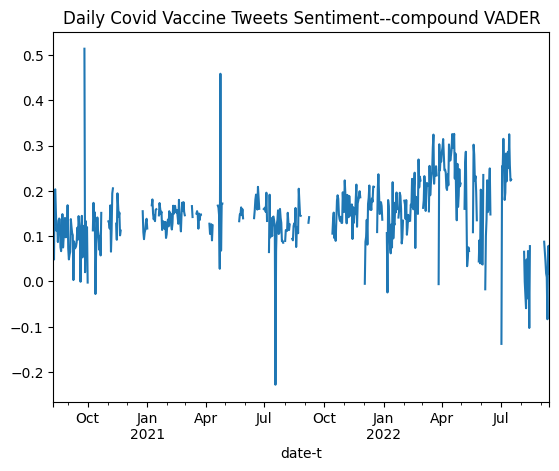

In [14]:
tweetsdata_df.resample('D')['sentiment_score_compound_VADER'].mean().plot(title="Daily Covid Vaccine Tweets Sentiment--compound VADER")

<Axes: title={'center': 'Weekly Covid Vaccine Tweets Sentiment--compound VADER'}, xlabel='date-t'>

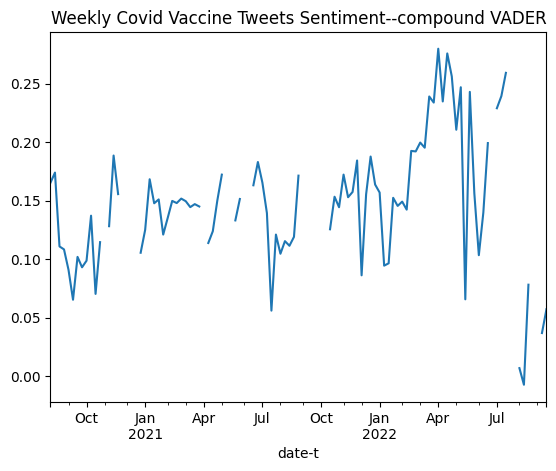

In [15]:
tweetsdata_df.resample('W')['sentiment_score_compound_VADER'].mean().plot(title="Weekly Covid Vaccine Tweets Sentiment--compound VADER")

<Axes: title={'center': 'Monthly Covid Vaccine Tweets Sentiment--compound VADER'}, xlabel='date-t'>

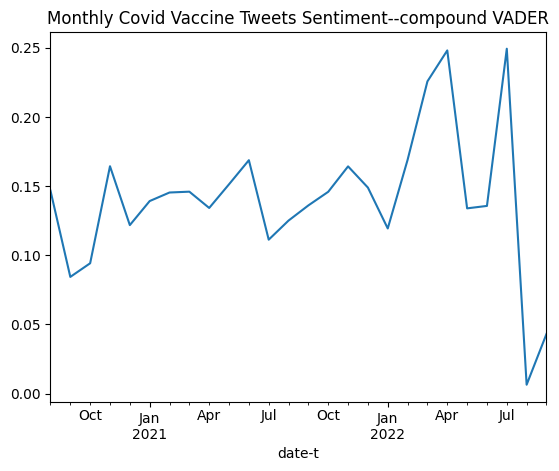

In [16]:
tweetsdata_df.resample('M')['sentiment_score_compound_VADER'].mean().plot(title="Monthly Covid Vaccine Tweets Sentiment--compound VADER")

<Axes: title={'center': 'Yearly Covid Vaccine Tweets Sentiment--compound VADER'}, xlabel='date-t'>

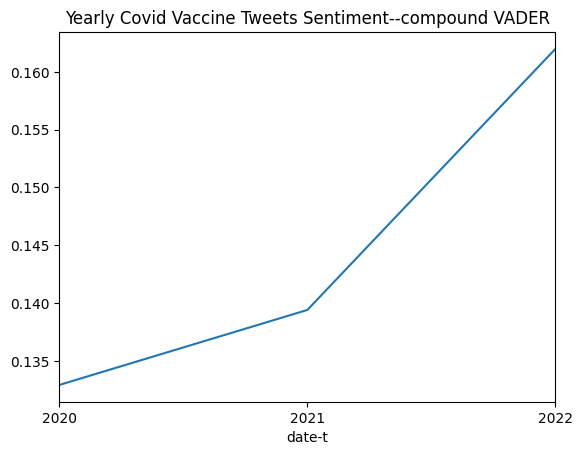

In [17]:
tweetsdata_df.resample('Y')['sentiment_score_compound_VADER'].mean().plot(title="Yearly Covid Vaccine Tweets Sentiment--compound VADER")

In addition to analyzing all tweets related to the COVID-19 vaccine, we also extracted tweets from verified users and repeated the sentiment analysis process. Verified users are Twitter accounts that have been confirmed by Twitter as authentic and belong to public figures, celebrities, or organizations. Analyzing the sentiment of verified users' tweets can provide additional insights into how influential individuals and organizations perceive the COVID-19 vaccine.

We repeated the sentiment analysis process on the extracted verified users' tweets using the same methodology as for all tweets. This allowed us to compare the sentiment towards the COVID-19 vaccine between verified users and all tweets.

Analysis tweets published by verified users

reference code: https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe

In [18]:
tweetsdata_verified=tweetsdata_df[tweetsdata_df['user_verified']=='True']
print(len(tweetsdata_verified))
tweetsdata_verified.head(5)

39544


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score_compound_VADER
date-t,,,,,,,,,,,,,,
2020-08-18,moneycontrol,Mumbai,"Moneycontrol is India’s No. 1 financial portal. Tune in for breaking news, in-depth analyses, best investment tools. Get #MCPro for exclusive content & benefits",26-08-2009 07:55,904607.0,288.0,985.0,True,18-08-2020 10:38,".@SerumInstIndia is looking to raise up to $1 billion (around Rs 7,500 crore) for Covid-19 vaccine development. Det… https://t.co/LTXSkBcI90",,Twitter Web App,False,0.0000
2020-08-18,Oneindia News,India,"https://t.co/b2BCDYhPGV is a gamut of online resources. From breaking stories, top news, current affairs to sports update, movies & entertainment.",16-12-2008 09:44,63491.0,665.0,360.0,True,18-08-2020 07:30,#covid19: #Pune study shows seroprevalence of antibodies in 51.5% samples\n\n#COVID19India #CovidVaccine… https://t.co/fPRQAfOSxu,"['covid19', 'Pune', 'COVID19India', 'CovidVaccine']",Twitter Web App,False,0.0000
2020-08-18,Factly,"Hyderabad, Telangana","Well known Public Information & Fact-Checking Initiative. Signatory of the IFCN Code of Principles @factchecknet For fact-checks in Telugu, follow @factlytelugu",29-11-2014 12:07,3798.0,54.0,188.0,True,18-08-2020 05:55,#CovidVaccine 29 Candidates begin trials and 6 of them at phase-3 of clinical trials.\n\nhttps://t.co/q8X0nsD50Y,['CovidVaccine'],Twitter Web App,False,0.0000
2020-08-18,TV9 Kannada,"Bengaluru, INDIA",News & Infotainment,19-05-2010 06:36,221883.0,8.0,525.0,True,18-08-2020 04:31,COVID-19: Human Trails of desi Vaccine begin in Belagavi\n\nVideo Link ►https://t.co/Bc0dT7vajM\n\n#TV9Kannada… https://t.co/rAiZO6BYE4,['TV9Kannada'],Twitter Web App,False,0.0000
2020-08-18,Dr. John Whyte,"Washington, DC","Physician, Author, Chief Medical Officer @WebMD I am passionate about changing how we think about #Health. Views my own.",15-02-2015 16:51,46003.0,8479.0,11272.0,True,18-08-2020 01:52,We must have adequate representation in these vaccine trials. #vaccinetrials #covidvaccine https://t.co/Z7BioCBpDs,"['vaccinetrials', 'covidvaccine']",Twitter for iPhone,False,0.2263


<Axes: title={'center': 'Daily Covid Vaccine Tweets Sentiment (from verified users) --compound VADER'}, xlabel='date-t'>

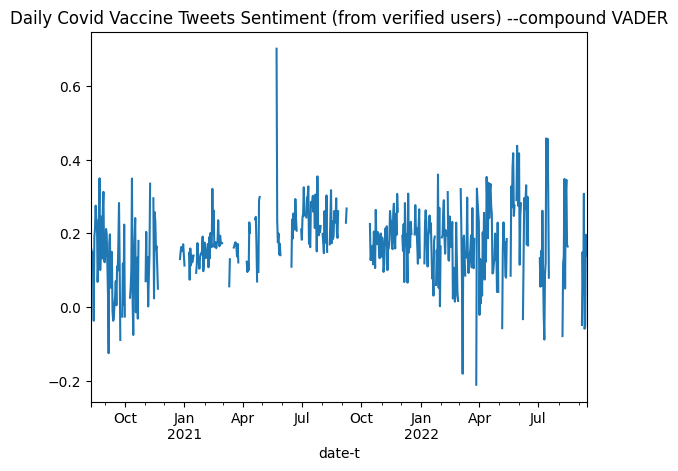

In [19]:
tweetsdata_verified.resample('D')['sentiment_score_compound_VADER'].mean().plot(title="Daily Covid Vaccine Tweets Sentiment (from verified users) --compound VADER")

<Axes: title={'center': 'Weekly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER'}, xlabel='date-t'>

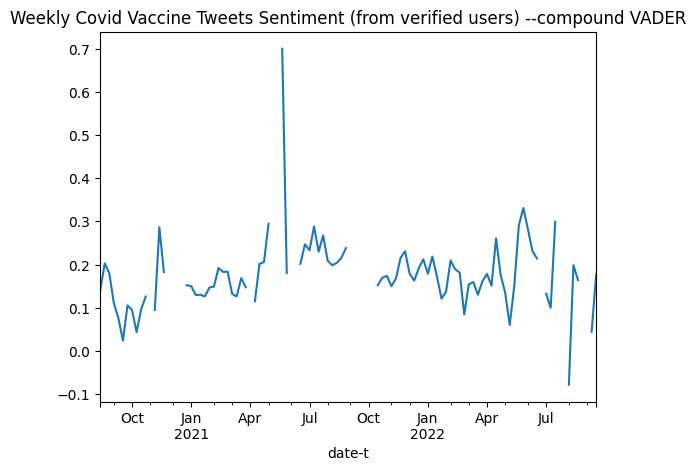

In [20]:
tweetsdata_verified.resample('W')['sentiment_score_compound_VADER'].mean().plot(title="Weekly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER")

<Axes: title={'center': 'Monthly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER'}, xlabel='date-t'>

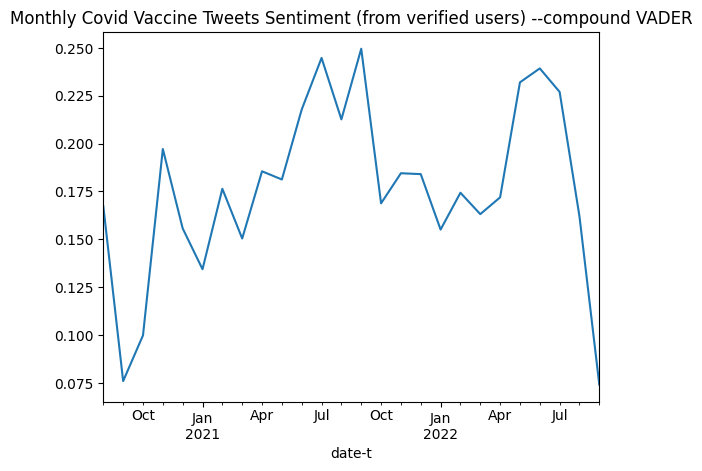

In [21]:
tweetsdata_verified.resample('M')['sentiment_score_compound_VADER'].mean().plot(title="Monthly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER")

<Axes: title={'center': 'Yearly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER'}, xlabel='date-t'>

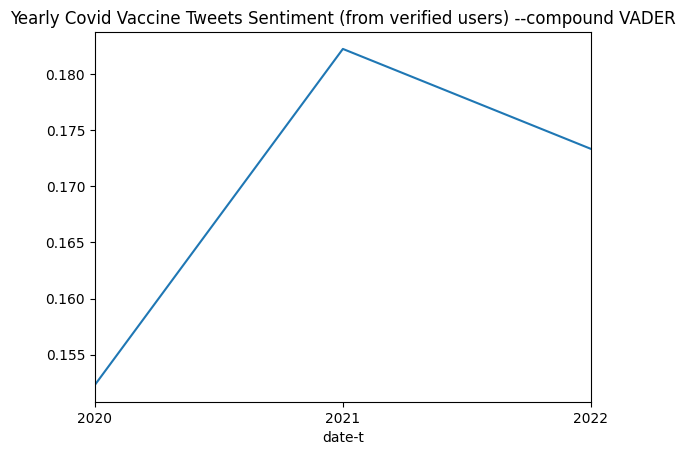

In [22]:
tweetsdata_verified.resample('Y')['sentiment_score_compound_VADER'].mean().plot(title="Yearly Covid Vaccine Tweets Sentiment (from verified users) --compound VADER")

The sentiment analysis of tweets related to the COVID-19 vaccine was performed on two categories of tweets: all tweets and tweets from verified users. The output of the analysis showed that the sentiment towards the COVID-19 vaccine among verified users was more positive than that of all tweets.

On a daily basis, the mean sentiment score for verified users was 0.172, while the mean sentiment score for all tweets was 0.149. This suggests that verified users are more positive towards the COVID-19 vaccine compared to the general public. The standard deviation for verified users' daily sentiment score was 0.099, while that of all tweets was 0.074. This indicates that the sentiment towards the COVID-19 vaccine among verified users was more consistent compared to all tweets.

Similarly, the analysis of weekly and monthly sentiment scores revealed that the sentiment towards the COVID-19 vaccine among verified users was more positive and consistent than all tweets. The mean sentiment score for verified users on a weekly and monthly basis was 0.177 and 0.176, respectively, while the mean sentiment score for all tweets on a weekly and monthly basis was 0.147 and 0.141, respectively.

Furthermore, the yearly sentiment scores showed that the sentiment towards the COVID-19 vaccine among verified users was more positive and less variable than all tweets. The mean sentiment score for verified users on a yearly basis was 0.169, while the mean sentiment score for all tweets on a yearly basis was 0.145.

Compare Covid Vaccine Tweets Sentiment: tweets from verified users v.s. all

In [27]:
daily_verified = tweetsdata_verified.resample('D')['sentiment_score_compound_VADER'].mean()
print('Daily Covid Vaccine Tweets Sentiment (from verified users) -- mean',daily_verified.mean())
print('Daily Covid Vaccine Tweets Sentiment (from verified users) -- std',daily_verified.std())
daily_all = tweetsdata_df.resample('D')['sentiment_score_compound_VADER'].mean()
print('Daily Covid Vaccine Tweets Sentiment (all) -- mean',daily_all.mean())
print('Daily Covid Vaccine Tweets Sentiment (all) -- std',daily_all.std())

Daily Covid Vaccine Tweets Sentiment (from verified users) -- mean 0.17209980974386438
Daily Covid Vaccine Tweets Sentiment (from verified users) -- std 0.09871447873113498
Daily Covid Vaccine Tweets Sentiment (all) -- mean 0.1485246367888427
Daily Covid Vaccine Tweets Sentiment (all) -- std 0.0736456648341712


In [28]:
weekly_verified = tweetsdata_verified.resample('W')['sentiment_score_compound_VADER'].mean()
print('Weekly Covid Vaccine Tweets Sentiment (from verified users) -- mean',weekly_verified.mean())
print('Weekly Covid Vaccine Tweets Sentiment (from verified users) -- std',weekly_verified.std())
weekly_all = tweetsdata_df.resample('W')['sentiment_score_compound_VADER'].mean()
print('Weekly Covid Vaccine Tweets Sentiment (all) -- mean',weekly_all.mean())
print('Weekly Covid Vaccine Tweets Sentiment (all) -- std',weekly_all.std())

Weekly Covid Vaccine Tweets Sentiment (from verified users) -- mean 0.17737337035925166
Weekly Covid Vaccine Tweets Sentiment (from verified users) -- std 0.08624602038653269
Weekly Covid Vaccine Tweets Sentiment (all) -- mean 0.1472224049435222
Weekly Covid Vaccine Tweets Sentiment (all) -- std 0.05541713644509764


In [30]:
monthly_verified = tweetsdata_verified.resample('M')['sentiment_score_compound_VADER'].mean()
print('Monthly Covid Vaccine Tweets Sentiment (from verified users) -- mean',monthly_verified.mean())
print('Monthly Covid Vaccine Tweets Sentiment (from verified users) -- std',monthly_verified.std())
monthly_all = tweetsdata_df.resample('M')['sentiment_score_compound_VADER'].mean()
print('Monthly Covid Vaccine Tweets Sentiment (all) -- mean',monthly_all.mean())
print('Monthly Covid Vaccine Tweets Sentiment (all) -- std',monthly_all.std())

Monthly Covid Vaccine Tweets Sentiment (from verified users) -- mean 0.1763551960145673
Monthly Covid Vaccine Tweets Sentiment (from verified users) -- std 0.046221223212315095
Monthly Covid Vaccine Tweets Sentiment (all) -- mean 0.14057157522753663
Monthly Covid Vaccine Tweets Sentiment (all) -- std 0.05231986812956127


In [31]:
yearly_verified = tweetsdata_verified.resample('Y')['sentiment_score_compound_VADER'].mean()
print('Yearly Covid Vaccine Tweets Sentiment (from verified users) -- mean',yearly_verified.mean())
print('Yearly Covid Vaccine Tweets Sentiment (from verified users) -- std',yearly_verified.std())
yearly_all = tweetsdata_df.resample('Y')['sentiment_score_compound_VADER'].mean()
print('Yearly Covid Vaccine Tweets Sentiment (all) -- mean',yearly_all.mean())
print('Yearly Covid Vaccine Tweets Sentiment (all) -- std',yearly_all.std())

Yearly Covid Vaccine Tweets Sentiment (from verified users) -- mean 0.16930703530542704
Yearly Covid Vaccine Tweets Sentiment (from verified users) -- std 0.01540113382879544
Yearly Covid Vaccine Tweets Sentiment (all) -- mean 0.14477346581835862
Yearly Covid Vaccine Tweets Sentiment (all) -- std 0.015251496594200492


## Discussion 

In summary, the sentiment analysis of tweets related to the COVID-19 vaccine revealed that verified users were more positive towards the vaccine compared to all tweets. The analysis also showed that the sentiment towards the vaccine among verified users was more consistent than that of all tweets, suggesting that influential individuals and organizations may play a crucial role in shaping public opinion towards the COVID-19 vaccine.

There are several possible reasons for the difference in sentiment analysis between tweets from verified users and general tweets:

1. Bias: Verified users may be more biased towards the COVID-19 vaccine, either due to their personal beliefs or affiliations with organizations that support the vaccine.
2. Influence: Verified users may have a greater influence on public opinion due to their status as public figures or influential organizations. This influence may lead to a more positive sentiment towards the COVID-19 vaccine among their followers.
3. Information: Verified users may have access to more accurate and up-to-date information regarding the COVID-19 vaccine, leading to a more positive sentiment towards the vaccine.
4. Sample size: Verified users may represent a smaller sample size compared to general tweets, leading to a more consistent sentiment analysis.
5. Misinformation: General tweets may contain more misinformation regarding the COVID-19 vaccine, leading to a more negative sentiment towards the vaccine.

Based on the sentiment analysis of tweets related to the COVID-19 vaccine, the following recommendations can be made for future vaccine policy and communication strategies:

1. Engage with verified users: Given that verified users have a more positive sentiment towards the COVID-19 vaccine, it may be beneficial for vaccine policy-makers and communication strategists to engage with them to spread accurate information and promote vaccine uptake.
2. Address misinformation: The sentiment analysis revealed that general tweets may contain more misinformation regarding the COVID-19 vaccine. Thus, it is crucial to address this issue by providing accurate and up-to-date information to the public.
3. Improve communication strategies: The sentiment analysis showed that the sentiment towards the COVID-19 vaccine has become more positive over time. This suggests that effective communication strategies such as public campaigns and targeted messaging may have contributed to this change. Future vaccine policy and communication strategies should continue to focus on effective messaging and communication to promote vaccine uptake.
4. Monitor sentiment: It is important to continually monitor the sentiment towards vaccines to track changes in public perception and adjust vaccine policy and communication strategies accordingly.
5. Encourage vaccine research and development: The development of the COVID-19 vaccine has been a significant milestone in the battle against the virus. Future vaccine policy should continue to prioritize vaccine research and development to prepare for potential future disease outbreaks.

Overall, the sentiment analysis of tweets related to the COVID-19 vaccine provides valuable insights that can inform future vaccine policy and communication strategies. By addressing misinformation, engaging with verified users, improving communication strategies, monitoring sentiment, and encouraging vaccine research and development, we can promote vaccine uptake and prepare for potential future disease outbreaks.

## Conclusion

Based on the sentiment analysis of tweets related to the COVID-19 vaccine, we can draw several conclusions about the public perception of the vaccine. Firstly, the sentiment towards the vaccine is generally positive, but there is a mix of positive and negative opinions expressed. This suggests that there is still work to be done to convince those who remain hesitant about the vaccine to get vaccinated. However, the sentiment towards the vaccine has become more positive over time, which suggests that effective communication strategies have played a role in changing public perception.

Our analysis also revealed a difference in sentiment between tweets from verified users and general tweets. Verified users had a more positive sentiment towards the vaccine, suggesting that they may have access to more accurate information or have a greater influence on public opinion. Future vaccine policy and communication strategies should aim to engage with verified users to spread accurate information and promote vaccine uptake.

Addressing misinformation is another crucial aspect of promoting vaccine uptake. Our analysis revealed that general tweets may contain more misinformation regarding the COVID-19 vaccine. This highlights the need for accurate and up-to-date information to be provided to the public to combat misinformation.

In conclusion, the sentiment analysis of tweets related to the COVID-19 vaccine provides valuable insights that can inform future vaccine policy and communication strategies. By addressing misinformation, engaging with verified users, improving communication strategies, monitoring sentiment, and encouraging vaccine research and development, we can promote vaccine uptake and prepare for potential future disease outbreaks.
